- Tanguy Malandain
- Hugo Deplagne
- Pierre Litoux
- Param Dave

# Reaffectation illustrative

### Import modules

In [1]:
import numpy as np
import pandas as pd

### Load dataframe

In [2]:
df = pd.read_csv("data/clusters.csv")
df.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102,cluster_usage,cluster_attitude
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,0.0,...,1,2,1.0,1,1,24,0,4,1,2
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,0.0,...,1,2,1.0,4,1,50,0,1,4,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,0.0,...,2,1,1.0,3,2,37,1,3,4,2
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,0.0,...,1,2,1.0,5,3,63,0,2,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,0.0,1.0,...,2,1,1.0,3,1,44,1,3,3,2


#### Pour les clusters sur les question d'usage

Prendre les questions d'attitude et les questions mentionnees.

In [3]:
selected_columns = list(range(3)) + list(range(30, 67)) + list(range(df.shape[1]-18, df.shape[1]))

# Create a new DataFrame with the selected columns
df_cluster = df.iloc[:, selected_columns].copy()

df_usage = df_cluster.drop("cluster_attitude", axis=1)
df_usage.rename(columns={'cluster_usage': 'cluster'}, inplace=True)
df_usage.columns


Index(['cle', 'Respondent_ID', 'weight', 'A9_1_slice', 'A9_2_slice',
       'A9_3_slice', 'A9_4_slice', 'A9_5_slice', 'A9_6_slice', 'A9_7_slice',
       'A9_8_slice', 'A9_9_slice', 'A9_10_slice', 'A9_11_slice', 'A9_12_slice',
       'A9_13_slice', 'A9_14_slice', 'A9_15_slice', 'A9_16_slice',
       'A10_1_slice', 'A10_2_slice', 'A10_3_slice', 'A10_4_slice',
       'A10_5_slice', 'A10_6_slice', 'A10_7_slice', 'A10_8_slice',
       'A11_1_slice', 'A11_2_slice', 'A11_3_slice', 'A11_4_slice',
       'A11_5_slice', 'A11_6_slice', 'A11_7_slice', 'A11_8_slice',
       'A11_9_slice', 'A11_10_slice', 'A11_11_slice', 'A11_12_slice',
       'A11_13_slice', 'rs3', 'rs5', 'rs6', 'RS1', 'RS191', 'RS192', 'RS193',
       'RS102RECAP', 'rs11recap2', 'RS11recap', 'RS193bis', 'RS2Recap',
       'RS56Recap', 'RS2', 'RS11', 'RS102', 'cluster'],
      dtype='object')

#### Pour les clusters sur les question d'attitude

Prendre les questions d'usage et les questions mentionnees.

In [4]:
df_attitude = df.iloc[:, list(range(30)) + list(range(-18, -2))].copy()
df_attitude["cluster"] = df["cluster_attitude"]
df_attitude.columns

Index(['cle', 'Respondent_ID', 'weight', 'A11', 'A12', 'A13', 'A14', 'A4',
       'A5', 'A5bis', 'A8_1_slice', 'A8_2_slice', 'A8_3_slice', 'A8_4_slice',
       'B1_1_slice', 'B1_2_slice', 'B2_1_slice', 'B2_2_slice', 'B3', 'B4',
       'B6', 'C1_1_slice', 'C1_2_slice', 'C1_3_slice', 'C1_4_slice',
       'C1_5_slice', 'C1_6_slice', 'C1_7_slice', 'C1_8_slice', 'C1_9_slice',
       'rs3', 'rs5', 'rs6', 'RS1', 'RS191', 'RS192', 'RS193', 'RS102RECAP',
       'rs11recap2', 'RS11recap', 'RS193bis', 'RS2Recap', 'RS56Recap', 'RS2',
       'RS11', 'RS102', 'cluster'],
      dtype='object')

### Implement reaffectation

In [5]:
from utils import train_and_evaluate

#### Pour la segmentation variable verte.


Accuracy Score: 0.596


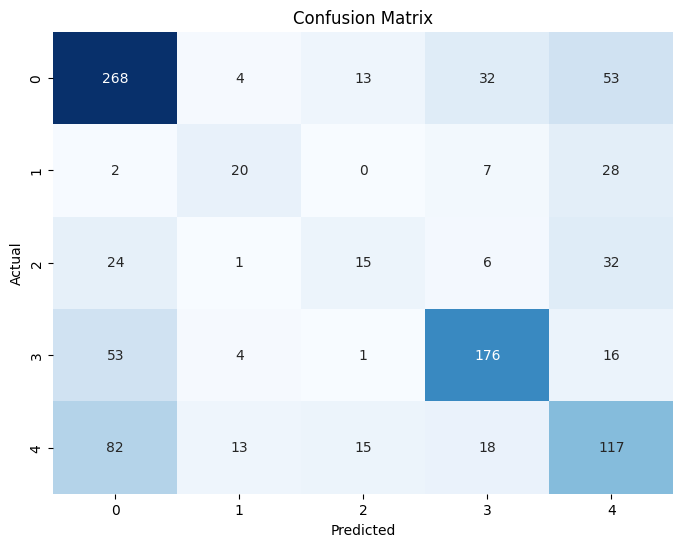

0.596

In [6]:
train_and_evaluate(df_usage, df_usage.iloc[:, 3:-1].columns)

Nous obtenons une precision de 59.6% pour la segmentation variable verte. Un resultat peu satisfaisant. Ceci est du au fait que les clusters n'ont pas ete forme à partir de ces questions.

#### Pour la segmentation variable orange


Accuracy Score: 0.484


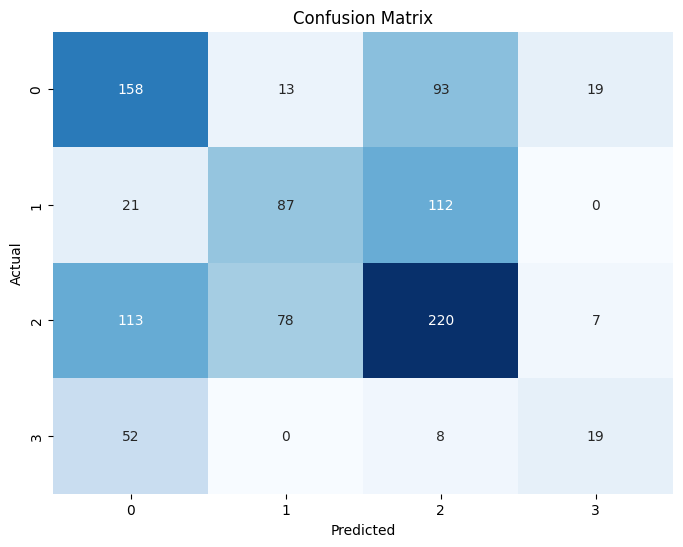

0.484

In [7]:
train_and_evaluate(df_attitude, df_attitude.iloc[:, 3:-1].columns)

Nous obtenons une precision de 48.4% pour la segmentation variable orange. Un resultat peu satisfaisant. Ceci est du au fait que les clusters n'ont pas ete forme à partir de ces questions.